In [271]:
import pandas as pd
data = pd.read_csv("Data/btc.csv")
data.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,2009-01-03,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2009-01-04,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2009-01-05,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2009-01-06,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2009-01-07,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


### Investigate April 2017 bull run


In [272]:
ap17_df = data[(data['date']>= '2017-03-01') & (data['date'] <= '2019-03-31')][['date','PriceUSD','HashRate']]
ap17_df

,date,PriceUSD,HashRate
2979,2017-03-01,1228.459651,3.155225e+06
2980,2017-03-02,1262.931467,3.440072e+06
2981,2017-03-03,1289.363191,3.349345e+06
2982,2017-03-04,1268.940664,3.023456e+06
2983,2017-03-05,1276.273683,3.367030e+06
...,...,...,...
3735,2019-03-27,4027.007918,4.725014e+07
3736,2019-03-28,4010.937462,4.629879e+07
3737,2019-03-29,4089.461040,4.661591e+07
3738,2019-03-30,4091.891038,4.407899e+07


In [273]:
# create two week average of price and hashrate

df_2w = ap17_df[['date', 'HashRate', 'PriceUSD']]
df_2w['date'] =  pd.to_datetime(df_2w['date'])

df_2w = df_2w.resample('2W-Wed', label='right', closed = 'right', on='date').mean().reset_index().sort_values(by='date')
df_2w

,date,HashRate,PriceUSD
0,2017-03-01,3.155225e+06,1228.459651
1,2017-03-15,3.375893e+06,1229.394336
2,2017-03-29,3.559732e+06,1031.591304
3,2017-04-12,3.739272e+06,1155.653300
4,2017-04-26,3.728966e+06,1222.144239
5,2017-05-10,4.025063e+06,1514.983109
6,2017-05-24,4.317536e+06,1937.400781
7,2017-06-07,5.010967e+06,2416.979438
8,2017-06-21,5.011290e+06,2665.979949
9,2017-07-05,5.287023e+06,2545.436393


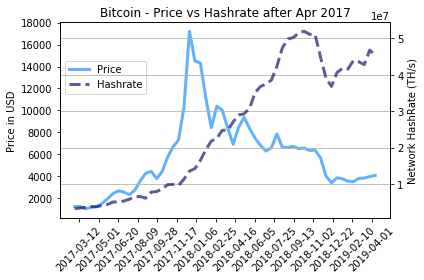

In [274]:
# make line plots for the trends

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots()

line_weight = 3
alpha = 0.7
tick_spacing = 50

lns1 = ax1.plot(df_2w['date'], df_2w['PriceUSD'], color='dodgerblue', lw=line_weight, alpha=alpha, label='Price')

plt.xticks(rotation=45)
ax2 = ax1.twinx()
lns2 = ax2.plot(df_2w['date'], df_2w['HashRate'],'--', color='midnightblue', lw=line_weight, alpha=alpha, label='Hashrate')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

ax1.set_ylabel(r"Price in USD")
ax2.set_ylabel(r"Network HashRate (TH/s)")
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, bbox_to_anchor = (0,0,0.6,0.83))

plt.title("Bitcoin - Price vs Hashrate after Apr 2017")

fig.tight_layout()
plt.grid()
plt.show()

In [275]:
# define growth rate for price and hashrate for two week periods
tmp = df_2w

for i in range(1, tmp.shape[0]):
    tmp.loc[tmp.index[i], '%change_price'] = ((tmp['PriceUSD'].iloc[i] - tmp['PriceUSD'].iloc[i-1])/(tmp['PriceUSD'].iloc[i-1]))*100
    tmp.loc[tmp.index[i], '%change_hashrate'] = ((tmp['HashRate'].iloc[i] - tmp['HashRate'].iloc[i-1])/(tmp['HashRate'].iloc[i-1]))*100
tmp

,date,HashRate,PriceUSD,%change_price,%change_hashrate
0,2017-03-01,3.155225e+06,1228.459651,NaN,NaN
1,2017-03-15,3.375893e+06,1229.394336,0.076086,6.993708
2,2017-03-29,3.559732e+06,1031.591304,-16.089470,5.445639
3,2017-04-12,3.739272e+06,1155.653300,12.026274,5.043638
4,2017-04-26,3.728966e+06,1222.144239,5.753537,-0.275600
5,2017-05-10,4.025063e+06,1514.983109,23.961073,7.940464
6,2017-05-24,4.317536e+06,1937.400781,27.882665,7.266278
7,2017-06-07,5.010967e+06,2416.979438,24.753714,16.060810
8,2017-06-21,5.011290e+06,2665.979949,10.302136,0.006444
9,2017-07-05,5.287023e+06,2545.436393,-4.521548,5.502245


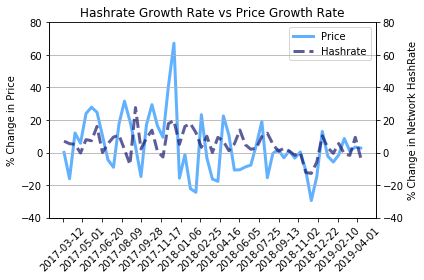

In [276]:
# plot growth rates for both

fig, ax1 = plt.subplots()

line_weight = 3
alpha = 0.7
tick_spacing = 50

lns1 = ax1.plot(tmp['date'], tmp['%change_price'], color='dodgerblue', lw=line_weight, alpha=alpha, label='Price')

plt.xticks(rotation=45)
ax2 = ax1.twinx()
lns2 = ax2.plot(tmp['date'], tmp['%change_hashrate'],'--', color='midnightblue', lw=line_weight, alpha=alpha, label='Hashrate')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

ax1.set_ylabel(r"% Change in Price")
ax2.set_ylabel(r"% Change in Network HashRate")
ax1.set_ylim(-40,80)
ax2.set_ylim(-40,80)
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, bbox_to_anchor = (0,0,1,1))

plt.title("Hashrate Growth Rate vs Price Growth Rate")

fig.tight_layout()
plt.grid()
plt.show()

In [277]:
# Compute (Hashrate change - price change)
# if this value is +ve, hashrate is growing faster than rate of price growth. if it's negative, price change is greater

tmp2 = tmp
for i in range(1, tmp2.shape[0]):
    tmp2.loc[tmp2.index[i], 'hashgrowth-pricegrowth'] = (tmp2['%change_hashrate'].iloc[i] - tmp['%change_price'].iloc[i])
tmp2

,date,HashRate,PriceUSD,%change_price,%change_hashrate,hashgrowth-pricegrowth
0,2017-03-01,3.155225e+06,1228.459651,NaN,NaN,NaN
1,2017-03-15,3.375893e+06,1229.394336,0.076086,6.993708,6.917622
2,2017-03-29,3.559732e+06,1031.591304,-16.089470,5.445639,21.535109
3,2017-04-12,3.739272e+06,1155.653300,12.026274,5.043638,-6.982636
4,2017-04-26,3.728966e+06,1222.144239,5.753537,-0.275600,-6.029137
5,2017-05-10,4.025063e+06,1514.983109,23.961073,7.940464,-16.020609
6,2017-05-24,4.317536e+06,1937.400781,27.882665,7.266278,-20.616387
7,2017-06-07,5.010967e+06,2416.979438,24.753714,16.060810,-8.692904
8,2017-06-21,5.011290e+06,2665.979949,10.302136,0.006444,-10.295692
9,2017-07-05,5.287023e+06,2545.436393,-4.521548,5.502245,10.023793


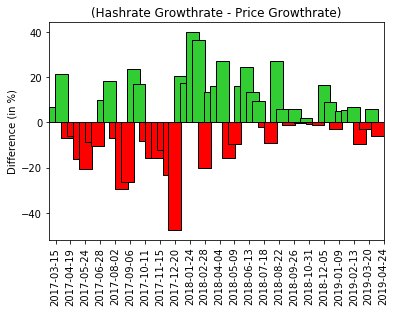

In [278]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()

colors = []
diff_list = tmp2['hashgrowth-pricegrowth'].tolist()

diff_dict = {}
num = list(range(0,len(diff_list)))

alpha = 1

for i in num:
    diff_dict[i] = diff_list[i]

for value in diff_dict.keys():
    if diff_dict[value] < 0:
        colors.append('r')
    else:
        colors.append('limegreen')

ax.bar(tmp2['date'], tmp2['hashgrowth-pricegrowth'], width=30, edgecolor='black', color=colors, alpha=alpha)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=35))
ax.autoscale(enable=True, axis='x', tight=True)
#ax.set_facecolor('beige')
plt.xticks(rotation=90)

plt.title('(Hashrate Growthrate - Price Growthrate)')
plt.ylabel('Difference (in %)')
plt.show()

### Investigate April 2019 surge in price

In [279]:
ap19_df = data[(data['date']>= '2019-02-01') & (data['date'] <= '2020-04-31')][['date','PriceUSD','HashRate']]
ap19_df

,date,PriceUSD,HashRate
3681,2019-02-01,3445.049891,4.566965e+07
3682,2019-02-02,3461.935117,4.162297e+07
3683,2019-02-03,3413.021616,3.988868e+07
3684,2019-02-04,3411.387962,4.249012e+07
3685,2019-02-05,3426.465011,4.249012e+07
...,...,...,...
4131,2020-04-26,7684.068522,1.086833e+08
4132,2020-04-27,7777.491519,1.118566e+08
4133,2020-04-28,7769.899698,1.221696e+08
4134,2020-04-29,8761.837170,1.150298e+08


In [280]:
# create two week average of price and hashrate

ap19df_2w = ap19_df[['date', 'HashRate', 'PriceUSD']]
ap19df_2w['date'] =  pd.to_datetime(ap19df_2w['date'])

ap19df_2w = ap19df_2w.resample('2W-Wed', label='right', closed = 'right', on='date').mean().reset_index().sort_values(by='date')
ap19df_2w

,date,HashRate,PriceUSD
0,2019-02-06,4.326091e+07,3420.894327
1,2019-02-20,4.406804e+07,3644.060358
2,2019-03-06,4.331547e+07,3836.311927
3,2019-03-20,4.515073e+07,3912.912244
4,2019-04-03,4.562276e+07,4146.756207
5,2019-04-17,4.535619e+07,5129.217258
6,2019-05-01,4.687102e+07,5276.977178
7,2019-05-15,4.849574e+07,6482.059856
8,2019-05-29,5.272808e+07,8084.904432
9,2019-06-12,5.282164e+07,8084.711922


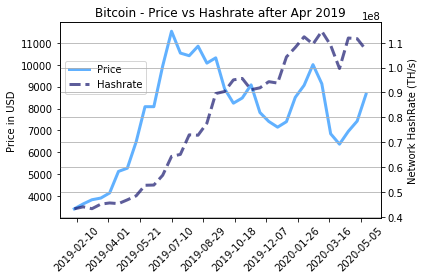

In [281]:
# make line plots for the trends

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots()

line_weight = 3
alpha = 0.7
tick_spacing = 50

lns1 = ax1.plot(ap19df_2w['date'], ap19df_2w['PriceUSD'], color='dodgerblue', lw=line_weight, alpha=alpha, label='Price')

plt.xticks(rotation=45)
ax2 = ax1.twinx()
lns2 = ax2.plot(ap19df_2w['date'], ap19df_2w['HashRate'],'--', color='midnightblue', lw=line_weight, alpha=alpha, label='Hashrate')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

ax1.set_ylabel(r"Price in USD")
ax2.set_ylabel(r"Network HashRate (TH/s)")
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, bbox_to_anchor = (0,0,0.6,0.83))

plt.title("Bitcoin - Price vs Hashrate after Apr 2019")

fig.tight_layout()
plt.grid()
plt.show()

In [283]:
# define growth rate for price and hashrate for two week periods
tmp = ap19df_2w

for i in range(1, tmp.shape[0]):
    tmp.loc[tmp.index[i], '%change_price'] = ((tmp['PriceUSD'].iloc[i] - tmp['PriceUSD'].iloc[i-1])/(tmp['PriceUSD'].iloc[i-1]))*100
    tmp.loc[tmp.index[i], '%change_hashrate'] = ((tmp['HashRate'].iloc[i] - tmp['HashRate'].iloc[i-1])/(tmp['HashRate'].iloc[i-1]))*100
tmp

,date,HashRate,PriceUSD,%change_price,%change_hashrate
0,2019-02-06,4.326091e+07,3420.894327,NaN,NaN
1,2019-02-20,4.406804e+07,3644.060358,6.523617,1.865730
2,2019-03-06,4.331547e+07,3836.311927,5.275751,-1.707758
3,2019-03-20,4.515073e+07,3912.912244,1.996718,4.236963
4,2019-04-03,4.562276e+07,4146.756207,5.976213,1.045454
5,2019-04-17,4.535619e+07,5129.217258,23.692279,-0.584290
6,2019-05-01,4.687102e+07,5276.977178,2.880750,3.339843
7,2019-05-15,4.849574e+07,6482.059856,22.836610,3.466366
8,2019-05-29,5.272808e+07,8084.904432,24.727395,8.727248
9,2019-06-12,5.282164e+07,8084.711922,-0.002381,0.177441


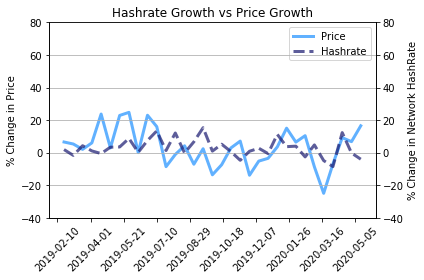

In [284]:
# plot growth rates for both

fig, ax1 = plt.subplots()

line_weight = 3
alpha = 0.7
tick_spacing = 50

lns1 = ax1.plot(tmp['date'], tmp['%change_price'], color='dodgerblue', lw=line_weight, alpha=alpha, label='Price')

plt.xticks(rotation=45)
ax2 = ax1.twinx()
lns2 = ax2.plot(tmp['date'], tmp['%change_hashrate'],'--', color='midnightblue', lw=line_weight, alpha=alpha, label='Hashrate')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

ax1.set_ylabel(r"% Change in Price")
ax2.set_ylabel(r"% Change in Network HashRate")
ax1.set_ylim(-40,80)
ax2.set_ylim(-40,80)
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, bbox_to_anchor = (0,0,1,1))

plt.title("Hashrate Growth vs Price Growth")

fig.tight_layout()
plt.grid()
plt.show()

In [285]:
# Compute (Hashrate change - price change)
# if this value is +ve, hashrate is growing faster than rate of price growth. if it's negative, price change is greater

tmp2 = tmp
for i in range(1, tmp2.shape[0]):
    tmp2.loc[tmp2.index[i], 'hashgrowth-pricegrowth'] = (tmp2['%change_hashrate'].iloc[i] - tmp['%change_price'].iloc[i])
tmp2

,date,HashRate,PriceUSD,%change_price,%change_hashrate,hashgrowth-pricegrowth
0,2019-02-06,4.326091e+07,3420.894327,NaN,NaN,NaN
1,2019-02-20,4.406804e+07,3644.060358,6.523617,1.865730,-4.657887
2,2019-03-06,4.331547e+07,3836.311927,5.275751,-1.707758,-6.983510
3,2019-03-20,4.515073e+07,3912.912244,1.996718,4.236963,2.240246
4,2019-04-03,4.562276e+07,4146.756207,5.976213,1.045454,-4.930758
5,2019-04-17,4.535619e+07,5129.217258,23.692279,-0.584290,-24.276569
6,2019-05-01,4.687102e+07,5276.977178,2.880750,3.339843,0.459093
7,2019-05-15,4.849574e+07,6482.059856,22.836610,3.466366,-19.370244
8,2019-05-29,5.272808e+07,8084.904432,24.727395,8.727248,-16.000148
9,2019-06-12,5.282164e+07,8084.711922,-0.002381,0.177441,0.179822


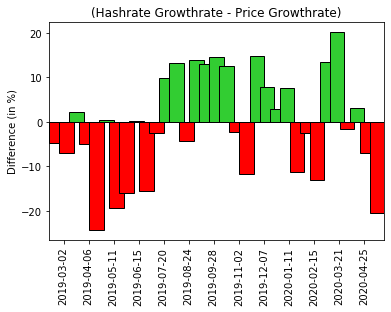

In [286]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()

colors = []
diff_list = tmp2['hashgrowth-pricegrowth'].tolist()

diff_dict = {}
num = list(range(0,len(diff_list)))

alpha = 1

for i in num:
    diff_dict[i] = diff_list[i]

for value in diff_dict.keys():
    if diff_dict[value] < 0:
        colors.append('r')
    else:
        colors.append('limegreen')

ax.bar(tmp2['date'], tmp2['hashgrowth-pricegrowth'], width=20, edgecolor='black', color=colors, alpha=alpha)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=35))
ax.autoscale(enable=True, axis='x', tight=True)
#ax.set_facecolor('beige')
plt.xticks(rotation=90)

plt.title('(Hashrate Growthrate - Price Growthrate)')
plt.ylabel('Difference (in %)')
plt.show()